In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%%capture
!cp -r /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam/compressed /
!rm -r /words
!mkdir -p /words
!tar xvzf /compressed/words.tgz -C /words
!rm -r /lines
!mkdir -p /lines
!tar xvzf /compressed/lines.tgz -C /lines
!rm -r /forms
!mkdir -p /forms
!tar xvzf /compressed/formsA-D.tgz -C /forms
!tar xvzf /compressed/formsE-H.tgz -C /forms
!tar xvzf /compressed/formsI-Z.tgz -C /forms
!rm -r /words_label
!mkdir -p /words_label
!tar xvzf /compressed/ascii.tgz -C /words_label
!rm -r /xml
!mkdir -p /xml
!tar xvzf /compressed/xml.tgz -C /xml


In [ ]:
base_path = "/words_label"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err": 
        words_list.append(line)

len(words_list)
words_list = words_list[0:100]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(2022)


In [ ]:
IMAGE_SIZE = (128,128)
from skimage.filters import sobel 
from numpy.lib.type_check import imag
base_image_path = os.path.join(base_path, "/words")
def get_images_and_labels(samples):
    data = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            img = cv2.imread(img_path,cv2.IMREAD_COLOR)
            resized_img = cv2.resize(img,IMAGE_SIZE)
            # image_array = np.array(resized_img).flatten()
            label = file_line.split("\n")[0].split(" ")[-1].strip()
            data.append((resized_img,label))
    return data
  
data = get_images_and_labels(words_list)
data[0],len(data)

((array([[[249, 249, 249],
          [249, 249, 249],
          [249, 249, 249],
          ...,
          [251, 251, 251],
          [251, 251, 251],
          [251, 251, 251]],
  
         [[249, 249, 249],
          [249, 249, 249],
          [249, 249, 249],
          ...,
          [251, 251, 251],
          [251, 251, 251],
          [251, 251, 251]],
  
         [[249, 249, 249],
          [249, 249, 249],
          [249, 249, 249],
          ...,
          [251, 251, 251],
          [251, 251, 251],
          [251, 251, 251]],
  
         ...,
  
         [[152, 152, 152],
          [152, 152, 152],
          [154, 154, 154],
          ...,
          [241, 241, 241],
          [241, 241, 241],
          [241, 241, 241]],
  
         [[161, 161, 161],
          [161, 161, 161],
          [163, 163, 163],
          ...,
          [242, 242, 242],
          [242, 242, 242],
          [242, 242, 242]],
  
         [[163, 163, 163],
          [163, 163, 163],
          [165, 165, 165

In [ ]:
import pickle
data_pickle = '/data.pickle'
pick_in_write = open(data_pickle,'wb')
pickle.dump(data,pick_in_write)
pick_in_write.close()

In [ ]:
pick_in_read = open(data_pickle,'rb')
data=pickle.load(pick_in_read)
pick_in_read.close()

In [ ]:
import random
random.shuffle(data)

In [ ]:
# char_list = set()
# for feature,label in data:
#   for char in label:
#     char_list.add(char)
# char_list = list(char_list)

In [ ]:
# def encode_to_labels(txt):
#     # encoding each output word into digits
#     dig_lst = []
#     for index, chara in enumerate(txt):
#         dig_lst.append(char_list.index(chara))
        
#     return dig_lst

features = []
tmp_labels =[]
for feature,label in data:
    features.append(feature)
    # tmp_labels.append(encode_to_labels(label))
    tmp_labels.append(label)

features = np.array(features)
labels = np.array(tmp_labels)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

# from sklearn.preprocessing import MultiLabelBinarizer
# labels_encoded = MultiLabelBinarizer().fit_transform(tmp_labels)


# from sklearn.preprocessing import LabelEncoder
# # import pandas as pd
# # df = pd.DataFrame(tmp_labels,columns=['labels'])
# le = LabelEncoder()
# le.fit(labels)
# labels_encoded = le.transform(labels)
# labels_encoded[0],labels[0],features[0]
# df['final_label']= le.fit_transform(df)
# labels = df['final_label'].to_list()
features[0],labels[0],data[0][1]
labels_encoded

array([23,  3, 49, 44, 18, 45, 22,  7, 17, 23, 21, 12,  1, 50,  8,  5, 12,
       46, 51, 33, 21,  6,  6,  0, 41, 31, 13, 27, 35, 34,  2, 18, 30, 36,
       50, 48, 20, 25, 15,  4, 13, 40,  9, 32, 29, 10, 26, 39, 50, 38, 20,
       24, 48, 14, 46,  0, 10, 33, 18,  1, 38, 14,  7, 37, 50, 43, 37, 19,
       45, 27, 12, 31, 34,  5, 40,  9,  3, 18, 50, 25, 26, 12, 28, 23, 43,
       42, 11, 18, 16,  1, 42,  7, 40, 31,  7, 41, 39,  2, 47,  0])

In [ ]:
# del data
import gc

gc.collect()

386

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,labels_encoded,test_size=.1)

In [ ]:
y_train[0]

31

In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0


In [ ]:
import pandas as pd
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        input_img = x_train[image, :,:,:]
        img = input_img
    #Add feature extractors, e.g. edge detection, smoothing, etc.             
         # FEATURE 1 - Pixel values
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature        
        # FEATURE 2 - Bunch of Gabor filter responses
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
#        edge_sobel = sobel(img)
#        edge_sobel1 = edge_sobel.reshape(-1)
#        df['Sobel'] = edge_sobel1
        image_dataset = image_dataset.append(df)
    return image_dataset


In [ ]:
%%capture
image_features = feature_extractor(x_train)
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_SVM = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features


In [ ]:
x_train.shape

(90, 128, 128, 3)

In [ ]:
y_train.shape

(90,)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
RF_model= SVC(decision_function_shape='ovo')

In [ ]:
RF_model.fit(X_for_SVM,y_train)

SVC(decision_function_shape='ovo')

In [ ]:
%%capture
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_SVM = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
test_prediction = RF_model.predict(test_for_SVM)

In [ ]:
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))
poly_f1 = metrics.f1_score(le.inverse_transform(y_test), test_prediction, average='weighted')
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
# #Print confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(labels, test_prediction)

# fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, ax=ax)

Accuracy =  0.0
F1 (Polynomial Kernel):  10.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


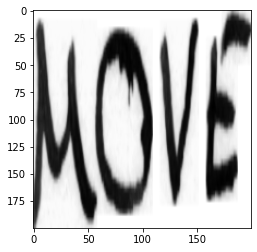

In [ ]:
# img_sample= x_test[7].reshape(IMAGE_SIZE)
# plt.imshow(img_sample,cmap='gray')
# plt.show()

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['to']
The actual label for this image is:  some


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


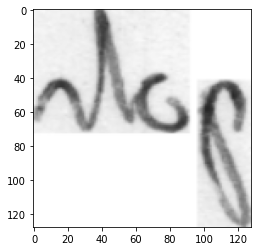

In [ ]:
#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", labels[n])